Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



Number of DC government owned properties within the boundary of Washington DC: 4175


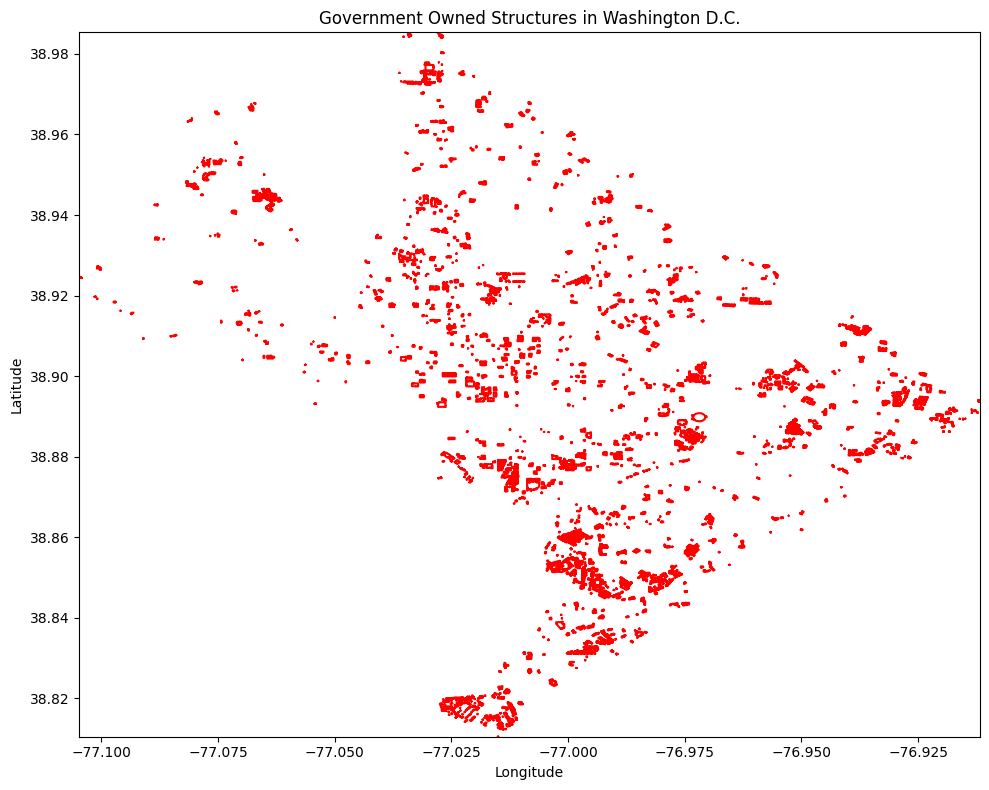

In [6]:
import zipfile  # I imported the zipfile because unzipping it was proving not to work properly

# I chose this specific data set because it seemed to be a very straightforward subject to visualize
# I was worried that making it more complicated would not create a proper looking result!

# Path to the zip file containing the government structures shapefile
structures_zip_file_path = "/content/drive/My Drive/Colab Notebooks/DC Outline Data/District_Government_Owned_Structures.zip"

# Create the extracted directory path for government structures
extracted_structures_dir_path = "/content/drive/My Drive/extracted_files/structures/"

# Extract the government structures shapefile
with zipfile.ZipFile(structures_zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_structures_dir_path)

# Load the necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Load the government structures shapefile
structures_shapefile_path = os.path.join(extracted_structures_dir_path, "District_Government_Owned_Structures.shp")
structures_data = gpd.read_file(structures_shapefile_path)

# This was made to outline the shape of each ward, however, it did not seem to work?
# Maybe you can shed some light on why this did not work properly?
fig, ax = plt.subplots(figsize=(10, 8))
structures_polygons_count = 0
for boundary in structures_data['geometry']:
    if boundary.geom_type == 'Polygon':
        x, y = boundary.exterior.coords.xy
        ax.plot(x, y, color='red')  # Plot the outline of the government structures in red
        structures_polygons_count += 1
    elif boundary.geom_type == 'MultiPolygon':
        for polygon in boundary:
            x, y = polygon.exterior.coords.xy
            ax.plot(x, y, color='red')
            structures_polygons_count += 1

# Create the bounding box of visible polygons
# I chose to do this, because some of the outlines of the buildings were so small, that they did not show up
# It seemed impractical to include them though I made this boundary setting for visualization purposes
minx, miny, maxx, maxy = structures_data.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Adding title and labels to the plot
ax.set_title("Government Owned Structures in Washington D.C.")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# The question I asked was: how many government owned properties are located within the boundary of DC? And this command answers that!
print("Number of DC government owned properties within the boundary of Washington DC:", structures_polygons_count)

# Print everything out!
plt.tight_layout()
plt.show()
